## title

In [168]:
import math
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
from sklearn.preprocessing import RobustScaler,OneHotEncoder,Normalizer

In [169]:
RobustScaler = RobustScaler()
OneHotEncoder = OneHotEncoder()
Normalizer = Normalizer()

In [170]:
from math import radians, cos, sin, asin, sqrt

In [171]:
df = pd.read_pickle('listings_clean.pkl')

In [172]:
charring_cross = (51.509865,-0.118092) 

In [173]:
def get_distance(lat1, lon1): 
    lat2 = charring_cross[0]
    lon2 = charring_cross[1]
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    return km

In [174]:
df['dist_from_center'] = df.apply(lambda x: get_distance(x['latitude'], x['longitude']), axis = 1)

In [175]:
df['dist_from_center']

0        6.479963
1        4.279984
2        1.955781
3        5.175395
4        9.875594
           ...   
83845    5.119379
83846    2.442164
83847    2.442164
83848    2.442164
83849    6.931176
Name: dist_from_center, Length: 82269, dtype: float64

In [176]:
df[df['dist_from_center'] <= 0.1]

,host_id,host_response_rate,host_listings_count,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,...,price,security_deposit,cleaning_fee,guests_included,extra_people,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,reviews_per_month,dist_from_center
7695,21772653,100.0,18.0,Westminster,WC2R,51.51066,-0.11871,Bed and breakfast,Private room,1,...,60.0,0.0,0.0,1,0.0,32,8,18,0.62,0.098141
7884,21772653,100.0,18.0,Westminster,WC2B 6JR,51.51009,-0.11888,Bed and breakfast,Private room,3,...,80.0,0.0,0.0,1,0.0,64,11,18,1.27,0.059961
23557,79435358,99.0,35.0,Westminster,WC2R 1HG,51.51067,-0.11835,Apartment,Private room,1,...,75.0,0.0,0.0,1,0.0,38,7,34,1.10,0.091218
23558,79435358,99.0,35.0,Westminster,WC2R 1HG,51.51051,-0.11778,Apartment,Private room,2,...,100.0,0.0,0.0,1,0.0,28,14,34,0.81,0.074853
24175,79435358,99.0,35.0,Westminster,WC2R 1HG,51.51032,-0.11843,Other,Private room,1,...,75.0,0.0,0.0,1,0.0,9,5,34,0.38,0.055704
24250,79435358,99.0,35.0,Westminster,WC2R 1HG,51.51011,-0.11782,Apartment,Private room,1,...,75.0,0.0,0.0,1,0.0,10,4,34,0.41,0.033093
24251,79435358,99.0,35.0,Westminster,WC2R 1HG,51.51040,-0.11765,Apartment,Private room,1,...,85.0,0.0,0.0,1,0.0,9,2,34,0.37,0.066851
24270,79435358,99.0,35.0,Westminster,WC2R 1HG,51.51023,-0.11859,Apartment,Private room,1,...,75.0,0.0,0.0,1,0.0,5,1,34,0.21,0.053211
24278,79435358,99.0,35.0,Westminster,WC2R 1HG,51.51002,-0.11810,Apartment,Private room,1,...,85.0,0.0,0.0,1,0.0,19,9,34,0.78,0.017233
24288,79435358,99.0,35.0,Westminster,WC2R 1HG,51.51024,-0.11822,Apartment,Private room,1,...,85.0,0.0,0.0,1,0.0,4,3,34,0.17,0.042602


## House Listings

In [177]:
df['property_type'].value_counts()

Apartment                 55774
House                     17064
Townhouse                  2920
Serviced apartment         1887
Condominium                1090
Bed and breakfast           857
Loft                        694
Guest suite                 347
Guesthouse                  273
Hostel                      227
Boutique hotel              222
Other                       185
Hotel                       151
Bungalow                    127
Cottage                      82
Villa                        62
Boat                         57
Aparthotel                   54
Tiny house                   41
Houseboat                    29
Cabin                        23
Casa particular (Cuba)       21
Camper/RV                    16
Chalet                       12
Barn                         12
Earth house                   9
Hut                           8
Farm stay                     4
Dome house                    3
Yurt                          3
Nature lodge                  2
Campsite

In [178]:
df['property_type'].unique()

array(['Apartment', 'Townhouse', 'House', 'Condominium',
       'Serviced apartment', 'Bed and breakfast', 'Aparthotel', 'Loft',
       'Other', 'Guest suite', 'Boat', 'Bungalow', 'Cottage',
       'Guesthouse', 'Villa', 'Cabin', 'Hostel', 'Parking Space',
       'Tiny house', 'Nature lodge', 'Camper/RV', 'Hut', 'Yurt',
       'Boutique hotel', 'Houseboat', 'Hotel', 'Chalet', 'Lighthouse',
       'Barn', 'Ryokan (Japan)', 'Casa particular (Cuba)', 'Island',
       'Earth house', 'Treehouse', 'Farm stay', 'Bus', 'Campsite', 'Tent',
       'Plane', 'Dome house'], dtype=object)

In [179]:
property_dict = dict(df['property_type'].value_counts())
property_dict

{'Apartment': 55774,
 'House': 17064,
 'Townhouse': 2920,
 'Serviced apartment': 1887,
 'Condominium': 1090,
 'Bed and breakfast': 857,
 'Loft': 694,
 'Guest suite': 347,
 'Guesthouse': 273,
 'Hostel': 227,
 'Boutique hotel': 222,
 'Other': 185,
 'Hotel': 151,
 'Bungalow': 127,
 'Cottage': 82,
 'Villa': 62,
 'Boat': 57,
 'Aparthotel': 54,
 'Tiny house': 41,
 'Houseboat': 29,
 'Cabin': 23,
 'Casa particular (Cuba)': 21,
 'Camper/RV': 16,
 'Chalet': 12,
 'Barn': 12,
 'Earth house': 9,
 'Hut': 8,
 'Farm stay': 4,
 'Dome house': 3,
 'Yurt': 3,
 'Nature lodge': 2,
 'Campsite': 2,
 'Treehouse': 2,
 'Tent': 2,
 'Bus': 2,
 'Ryokan (Japan)': 1,
 'Lighthouse': 1,
 'Parking Space': 1,
 'Island': 1,
 'Plane': 1}

In [180]:
other_list = [key for key, value in property_dict.items() if value < 300]
other_list

['Guesthouse',
 'Hostel',
 'Boutique hotel',
 'Other',
 'Hotel',
 'Bungalow',
 'Cottage',
 'Villa',
 'Boat',
 'Aparthotel',
 'Tiny house',
 'Houseboat',
 'Cabin',
 'Casa particular (Cuba)',
 'Camper/RV',
 'Chalet',
 'Barn',
 'Earth house',
 'Hut',
 'Farm stay',
 'Dome house',
 'Yurt',
 'Nature lodge',
 'Campsite',
 'Treehouse',
 'Tent',
 'Bus',
 'Ryokan (Japan)',
 'Lighthouse',
 'Parking Space',
 'Island',
 'Plane']

In [181]:
#df.loc[df['property_type'].isin(other_list), 'property_type']
df['property_type_clean'] = df['property_type'].apply(lambda i: i if i not in other_list else 'Other')

In [182]:
df['property_type_clean'].value_counts()

Apartment             55774
House                 17064
Townhouse              2920
Serviced apartment     1887
Other                  1636
Condominium            1090
Bed and breakfast       857
Loft                    694
Guest suite             347
Name: property_type_clean, dtype: int64

In [183]:
borough_pivot_property = df.pivot_table(index="neighbourhood_cleansed",columns='property_type_clean',values="price",aggfunc=('count'))
borough_pivot_property

property_type_clean,Apartment,Bed and breakfast,Condominium,Guest suite,House,Loft,Other,Serviced apartment,Townhouse
neighbourhood_cleansed,,,,,,,,,
Barking and Dagenham,123.0,8.0,3.0,2.0,173.0,1.0,5.0,4.0,14.0
Barnet,785.0,34.0,14.0,19.0,569.0,15.0,53.0,24.0,38.0
Bexley,68.0,5.0,1.0,3.0,130.0,1.0,8.0,2.0,14.0
Brent,1396.0,23.0,25.0,16.0,734.0,20.0,65.0,43.0,98.0
Bromley,254.0,17.0,2.0,8.0,258.0,2.0,38.0,64.0,21.0
Camden,4774.0,30.0,63.0,14.0,578.0,29.0,141.0,109.0,120.0
City of London,370.0,1.0,6.0,1.0,8.0,5.0,15.0,56.0,NaN
Croydon,461.0,33.0,12.0,11.0,442.0,4.0,36.0,26.0,39.0
Ealing,768.0,42.0,16.0,17.0,647.0,18.0,42.0,43.0,59.0


In [184]:
df.columns

Index(['host_id', 'host_response_rate', 'host_listings_count',
       'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'number_of_reviews',
       'number_of_reviews_ltm', 'calculated_host_listings_count',
       'reviews_per_month', 'dist_from_center', 'property_type_clean'],
      dtype='object')

In [185]:
df['parking'] = df['amenities'].str.lower().str.contains('parking')

In [186]:
df['parking'].value_counts()

False    49369
True     32900
Name: parking, dtype: int64

In [187]:
pd.set_option('max_colwidth', 400)
df[['parking','amenities']].sample(n=30, random_state=1)

,parking,amenities
30011,True,"{TV,Wifi,Kitchen,""Paid parking off premises"",""Pets allowed"",Breakfast,Heating,Washer,""Smoke detector"",""Carbon monoxide detector"",""Fire extinguisher"",Essentials,Shampoo,Hangers,""Hair dryer"",Iron,""Laptop friendly workspace"",""Private living room"",Microwave,""Coffee maker"",Refrigerator,""Dishes and silverware"",""Cooking basics"",Oven,Stove,""Patio or balcony"",""Luggage dropoff allowed"",""Long term stays ..."
46444,False,"{TV,Wifi,Kitchen,Heating,Essentials,Iron,""Laptop friendly workspace"",""Private living room""}"
41377,False,"{TV,Wifi,Kitchen,Heating,""Family/kid friendly"",Washer,""Smoke detector"",""Carbon monoxide detector"",Essentials,Shampoo,Hangers,""Hair dryer"",Iron,""Self check-in"",Lockbox,""Private entrance"",""Hot water"",""Bed linens"",Refrigerator,Dishwasher,""Dishes and silverware"",""Cooking basics"",Oven,Stove,""Full kitchen""}"
24160,False,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,""Family/kid friendly"",Washer,Dryer,""Smoke detector"",Essentials,Hangers,Iron,""Laptop friendly workspace"",Bathtub}"
42480,False,"{TV,Wifi,Kitchen,Elevator,Heating,""Family/kid friendly"",Washer,""Smoke detector"",""Carbon monoxide detector"",""First aid kit"",""Safety card"",""Fire extinguisher"",Essentials,Shampoo,Hangers,""Hair dryer"",Iron,""Laptop friendly workspace""}"
48154,True,"{TV,Wifi,""Paid parking off premises"",Heating,""Smoke detector"",""Carbon monoxide detector"",""First aid kit"",""Safety card"",Essentials,Shampoo,""Lock on bedroom door"",Hangers,""Hair dryer"",Iron,""Self check-in"",Lockbox,""Hot water"",""Luggage dropoff allowed"",""Long term stays allowed""}"
64111,True,"{Wifi,Kitchen,""Free parking on premises"",Heating,Washer,""Smoke detector"",Essentials,Shampoo,""Lock on bedroom door"",Hangers,""Laptop friendly workspace"",""Hot water""}"
78613,False,"{TV,Wifi,Kitchen,Heating,Washer,""Smoke detector"",""Carbon monoxide detector"",Essentials,Shampoo,Hangers,""Hair dryer"",Iron,""Laptop friendly workspace"",""Private entrance"",""Hot water"",""Bed linens"",Microwave,Refrigerator,""Dishes and silverware"",""Cooking basics"",Oven,Stove,""Patio or balcony"",""Garden or backyard"",""Host greets you""}"
41333,True,"{TV,Wifi,Kitchen,Heating,""Family/kid friendly"",Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""First aid kit"",""Safety card"",Essentials,Shampoo,""Hair dryer"",Iron,""Laptop friendly workspace"",""Hot water"",""Host greets you"",""Paid parking on premises""}"
36584,True,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,Washer,""Smoke detector"",""Carbon monoxide detector"",""Fire extinguisher"",Essentials,Shampoo,Hangers,""Hair dryer"",Iron,""Laptop friendly workspace"",""Private entrance"",Bathtub,""Hot water"",""Bed linens"",Microwave,Refrigerator,Dishwasher,""Dishes and silverware"",Oven,Stove,""Single level home"",""Patio or balcony"",""Long term stays allowed"",""No stairs or steps to ..."


In [188]:
df = df.drop(columns='amenities')

## Log Price

In [189]:
df['price_log'] = np.log(df['price'])

In [190]:
pd.reset_option('max_colwidth')

In [191]:
df.columns

Index(['host_id', 'host_response_rate', 'host_listings_count',
       'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'number_of_reviews', 'number_of_reviews_ltm',
       'calculated_host_listings_count', 'reviews_per_month',
       'dist_from_center', 'property_type_clean', 'parking', 'price_log'],
      dtype='object')

## Scalar Price

In [192]:
#df2 = df.copy()

In [193]:
df['price_RobustScaler'] = RobustScaler.fit_transform(df[['price']])

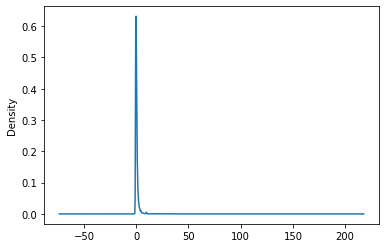

In [194]:
df['price_RobustScaler'].plot(kind='kde')

In [195]:
df[['price','price_log','price_RobustScaler']]

,price,price_log,price_RobustScaler
0,65.0,4.174387,-0.191489
1,100.0,4.605170,0.180851
2,300.0,5.703782,2.308511
3,175.0,5.164786,0.978723
4,65.0,4.174387,-0.191489
...,...,...,...
83845,100.0,4.605170,0.180851
83846,82.0,4.406719,-0.010638
83847,78.0,4.356709,-0.053191
83848,82.0,4.406719,-0.010638


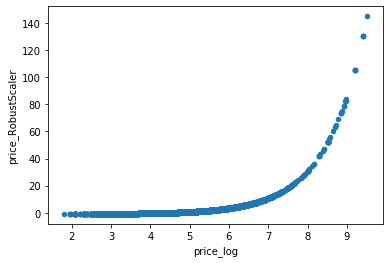

In [196]:
df[['price_log','price_RobustScaler']].plot(kind='scatter', x='price_log',y='price_RobustScaler')

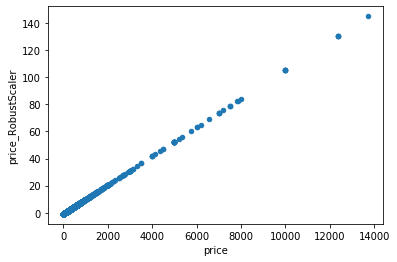

In [197]:
df[['price','price_RobustScaler']].plot(kind='scatter', x='price',y='price_RobustScaler')

In [198]:
df.columns

Index(['host_id', 'host_response_rate', 'host_listings_count',
       'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'number_of_reviews', 'number_of_reviews_ltm',
       'calculated_host_listings_count', 'reviews_per_month',
       'dist_from_center', 'property_type_clean', 'parking', 'price_log',
       'price_RobustScaler'],
      dtype='object')

In [199]:
df.to_pickle('listings_features.pkl')
df.to_csv('listings_features.csv')

### Correlation matrix

In [200]:
df.corr()

,host_id,host_response_rate,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,...,guests_included,extra_people,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,reviews_per_month,dist_from_center,parking,price_log,price_RobustScaler
host_id,1.000000,-0.033842,-0.056558,-0.009691,-0.005096,0.006771,0.003975,-0.045825,0.004874,0.059860,...,0.010564,-0.038624,-0.157333,-0.009376,-0.054901,0.207844,0.054406,-0.042643,0.043726,0.059860
host_response_rate,-0.033842,1.000000,0.036447,-0.000131,-0.011697,0.037480,0.014619,0.016365,0.028063,-0.001795,...,0.046068,0.021583,0.106520,0.140958,0.034417,0.150238,-0.049837,0.035933,0.010386,-0.001795
host_listings_count,-0.056558,0.036447,1.000000,-0.014714,-0.060154,0.176517,0.152334,0.200478,0.166954,0.124789,...,0.269569,-0.071166,-0.059572,-0.060265,0.982764,-0.055525,-0.045482,-0.106886,0.216214,0.124789
latitude,-0.009691,-0.000131,-0.014714,1.000000,0.109449,-0.008761,-0.014109,-0.029674,-0.012548,-0.011689,...,-0.000920,-0.000548,0.001922,-0.000531,-0.015733,0.006137,-0.119958,-0.074457,-0.019142,-0.011689
longitude,-0.005096,-0.011697,-0.060154,0.109449,1.000000,-0.056533,-0.059126,-0.057199,-0.055016,-0.061396,...,-0.035445,-0.001629,-0.021098,-0.022724,-0.059669,-0.031910,-0.146452,-0.004793,-0.133627,-0.061396
accommodates,0.006771,0.037480,0.176517,-0.008761,-0.056533,1.000000,0.506469,0.766947,0.810226,0.308625,...,0.519221,0.111183,-0.044641,-0.037407,0.178892,-0.042021,-0.095280,0.049084,0.622150,0.308625
bathrooms,0.003975,0.014619,0.152334,-0.014109,-0.059126,0.506469,1.000000,0.585408,0.529569,0.257294,...,0.286377,0.046328,-0.043974,-0.041114,0.150138,-0.049342,-0.026215,0.032564,0.344390,0.257294
bedrooms,-0.045825,0.016365,0.200478,-0.029674,-0.057199,0.766947,0.585408,1.000000,0.740500,0.286393,...,0.427540,0.065926,-0.079596,-0.085163,0.199672,-0.107860,0.004020,0.056455,0.510826,0.286393
beds,0.004874,0.028063,0.166954,-0.012548,-0.055016,0.810226,0.529569,0.740500,1.000000,0.249637,...,0.431051,0.087337,-0.047255,-0.041638,0.168503,-0.048650,-0.017055,0.056992,0.471537,0.249637
price,0.059860,-0.001795,0.124789,-0.011689,-0.061396,0.308625,0.257294,0.286393,0.249637,1.000000,...,0.221795,0.043405,-0.065163,-0.069656,0.116431,-0.051419,-0.137182,-0.036673,0.590165,1.000000


## Get average booking price for each property

### Booked Price logs

In [201]:
#full_listings_df["log_booked_price"] = np.log(full_listings_df["booked_price"]) 

In [202]:
#full_listings_df.plot(kind="scatter", x="dist_from_center", y="log_booked_price")